In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

## **Business Understanding**

Food recognition is an emerging topic in the field of computer vision and the interest in this area is justified by the rise in popularity of food diary applications.
As a stakeholder, I want to build a integrated system, which has the capability to recognise ingredients and therefore in the future it will be integrated in a recommendation system of recipes.
For this reason, I tackle the problem of food ingredients recognition as a multi-class learning problem. I propose a method for adapting a highly performing state of the art CNN in order to act as a multi-class predictor for learning food ingredients in terms of their nature.
I going try to prove that my model is able to give, given a picture, predict its group of ingredients..

The models were trained and validated using a set of approximately 5,530 images of 63 food ingredients primarily obtained from a combination of sources, divided by 3 main groups Meat, Grains and Fruits/Vegetables.

In future, the baseline model will be expanded upon in order to achieve a greater level of accuracy.

##  **Data Understanding**

To split folders with files (e.g. images) into train, validation and test (dataset) folders, I used a Python module, <i>split_mode</i>. 
To split into training, validation and test set, I set a tuple to 'ratio', i.e, '(.8, .1, .1)'.
To have a better understanding of the data, I plotted some training data.

In [2]:
import split_folders

input_folder = '../Food-Ingredients-Recognition/Data/ingredients/'
output_folder = '../Food-Ingredients-Recognition/Data/Split_Sets/'

# split_folders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.8, .1, .1)) 


In [3]:
input_path = '../Food-Ingredients-Recognition/Data/Split_Sets/'
train_dir = "../Food-Ingredients-Recognition/Data/Split_Sets/train/"
val_dir = "../Food-Ingredients-Recognition/Data/Split_Sets/val/"
test_dir = "../Food-Ingredients-Recognition/Data/Split_Sets/test/"

In [4]:
import os
meat_images = os.listdir(train_dir + "meat")
fruits_vegetables = os.listdir(train_dir + "fruits_vegetables")
grains = os.listdir(train_dir + "grains")

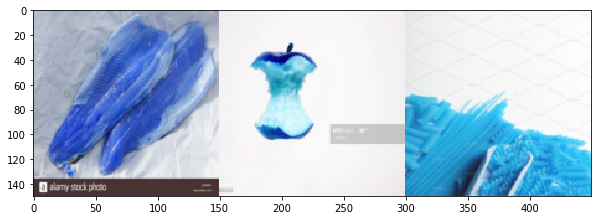

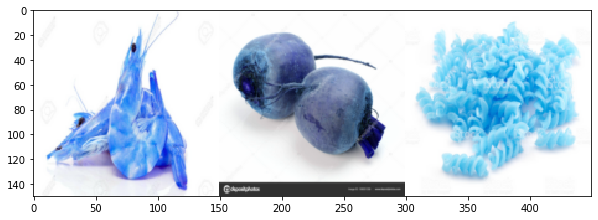

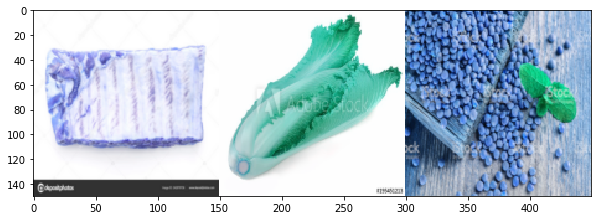

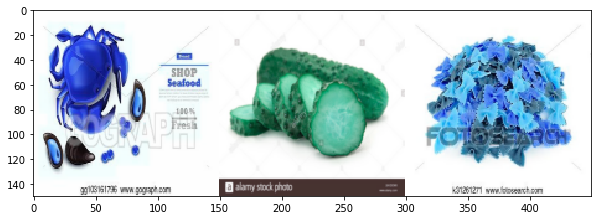

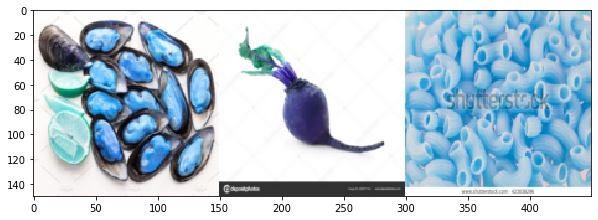

In [5]:
from skimage.transform import resize
import cv2
import skimage

def plotter(i):
    meat_prev = cv2.imread(train_dir+"meat/"+meat_images[i])
    meat_prev = skimage.transform.resize(meat_prev, (150, 150, 3))
    fruits_prev = cv2.imread(train_dir+"fruits_vegetables/"+fruits_vegetables[i])
    fruits_prev = skimage.transform.resize(fruits_prev, (150, 150, 3))# , mode = 'reflect')
    grains_prev = cv2.imread(train_dir+"grains/"+grains[i])
    grains_prev = skimage.transform.resize(grains_prev, (150, 150, 3))
    pair = np.concatenate((meat_prev, fruits_prev, grains_prev), axis=1)

    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(5,10):
    plotter(i)

# Data Preparation


Before the modeling, I defined as constants values, image dimensions(width:150, height:150) and batch_size.


In [6]:
batch_size = 32
input_shape = (150, 150)


In [7]:
# Generation of batches of tensor image per data set, and as augmentation parameter, I only use the rescale
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)


Using TensorFlow backend.


In [8]:
# Takes the path to a directory & generates batches of augmented data.


train_g = train_datagen.flow_from_directory(directory=train_dir, 
                                            target_size=input_shape, 
                                            batch_size=batch_size,
                                            class_mode='categorical')


val_g = val_datagen.flow_from_directory(directory=val_dir, 
                                        target_size=input_shape,
                                         batch_size=batch_size, 
                                         class_mode='categorical')    

Found 4419 images belonging to 3 classes.
Found 551 images belonging to 3 classes.


# Modeling - baseline


Baseline model consists of four convolution blocks with a max pool layer in each of them. There's a fully connected layer with 8 units on top of it that is activated by a relu activation function and thr units activated by a softmax activation function.

In [9]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, LeakyReLU, Activation

base = Sequential([
        Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu', padding='same', input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(32, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(16, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax')
])

Because all project is based on multi-class classification problem, the *loss* argument is set as *categorical_crossentropy*.

In [10]:
base.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])
             
base.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 16)       

In [11]:
# Fit_generator function

hist_5 = base.fit_generator(generator=train_g,
                            steps_per_epoch=50,
                            epochs=20, 
                            validation_data=val_g,
                            validation_steps=val_g.samples // batch_size)
#50 /150

Epoch 1/20
50/50 [==============================] - 315s 6s/step - loss: 1.1001 - accuracy: 0.3350 - val_loss: 1.0855 - val_accuracy: 0.4283
Epoch 2/20
50/50 [==============================] - 221s 4s/step - loss: 1.0264 - accuracy: 0.4806 - val_loss: 1.0562 - val_accuracy: 0.4817
Epoch 3/20
50/50 [==============================] - 237s 5s/step - loss: 0.9284 - accuracy: 0.5256 - val_loss: 0.8812 - val_accuracy: 0.5299
Epoch 4/20
50/50 [==============================] - 193s 4s/step - loss: 0.8877 - accuracy: 0.5625 - val_loss: 0.8156 - val_accuracy: 0.6012
Epoch 5/20
50/50 [==============================] - 193s 4s/step - loss: 0.8443 - accuracy: 0.6150 - val_loss: 0.9251 - val_accuracy: 0.6281
Epoch 6/20
50/50 [==============================] - 179s 4s/step - loss: 0.8308 - accuracy: 0.6620 - val_loss: 0.7678 - val_accuracy: 0.6262
Epoch 7/20
50/50 [==============================] - 205s 4s/step - loss: 0.7670 - accuracy: 0.6722 - val_loss: 0.7672 - val_accuracy: 0.6744
Epoch 8/20
50

In [ ]:
# PLotting the model's output
def plot_model_sum(hist_b):
    acc = hist_b.history['accuracy']
    val_acc = hist_b.history['val_accuracy']
    loss = hist_b.history['loss']
    val_loss = hist_b.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'teal', label='Train acc')
    plt.plot(epochs, val_acc, 'firebrick', label='Val acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'teal', label='Train loss')
    plt.plot(epochs, val_loss, 'firebrick', label='Val loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

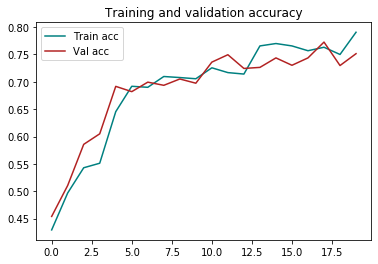

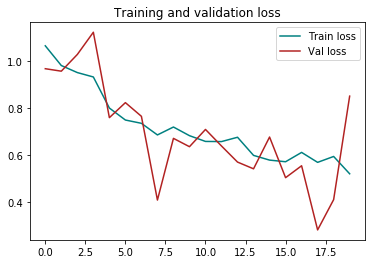

In [117]:
plot_model_sum(hist_5)

The accuracy gets better over the time, stabilising between 75% and 80%. Train and validation accuracy always show a slight discrepancy between them, for this reason, it is plausible to claim the model has the capability to generalise well. 

# Model 2 

For the second models, I take a  new approach, because the baseline model shows a good performing, I want to see if it is possible with more agumentation arguments get even better results.

In [ ]:
# For this model, I am apllying rescale, 45 degree rotation, horinzontal flip and zoom images up to 50% randomly.
train_data_aug = ImageDataGenerator(rescale=1./255, rotation_range=45, horizontal_flip=True, zoom_range=0.5)


In [58]:
train_aug = train_data_aug.flow_from_directory(directory=train_dir, 
                                            target_size=input_shape, 
                                            batch_size=batch_size,
                                            class_mode='categorical')


val_aug = val_datagen.flow_from_directory(directory=val_dir, 
                                        target_size=input_shape,
                                         batch_size=batch_size, 
                                         class_mode='categorical')   

Found 4419 images belonging to 3 classes.
Found 551 images belonging to 3 classes.


In [59]:
model_new = Sequential([
            Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu', padding='same', input_shape=(150, 150, 3)),
            MaxPooling2D(pool_size=(2,2),strides=2),
            Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2,2),strides=2),
            Conv2D(32, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2,2),strides=2),
            Conv2D(16, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2,2),strides=2),
            Flatten(),
            Dense(8, activation='relu'),
            Dense(3, activation='softmax')
])

In [60]:
model_new.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 37, 37, 32)        18464     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 18, 18, 16)       

In [61]:
# Fit_generator function

history_new = model_new.fit_generator(generator=train_aug,
                                      steps_per_epoch=50,
                                      epochs=20, 
                                      validation_data=val_aug,
                                      validation_steps=val_g.samples // batch_size)


Epoch 1/20


KeyboardInterrupt: 

In [62]:
plot_model_sum(history_new)

NameError: name 'history_new' is not defined

The second model shows a poor performance, obtaining worse results comparing with the baseline model. The augmentation's parameters brought no increase of performance to the model.

# Model 3

For the third model and based on the previous models results,  I going to use no augmentation, except the rescale, and use more epochs since the first model showed an increased performance over the time. Therefore, I want to see if it is possible to extrapolate the baseline model's accuracy  with a bigger range of epochs.

In [63]:

model_3 = Sequential([
        Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu', padding='same', input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(32, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(16, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax')
])

In [64]:
model_3.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])
             
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 37, 37, 32)        18464     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 18, 18, 16)       

In [50]:
# Model generator with  120 epochs
hist_model_3 = model_3.fit_generator(generator=train_g,
                            steps_per_epoch=50,
                            epochs=120, 
                            validation_data=val_g,
                            validation_steps=val_g.samples // batch_size)
#50 /150

Epoch 1/120
50/50 [==============================] - 355s 7s/step - loss: 1.0985 - accuracy: 0.3494 - val_loss: 1.0939 - val_accuracy: 0.3511
Epoch 2/120
50/50 [==============================] - 351s 7s/step - loss: 1.0983 - accuracy: 0.3431 - val_loss: 1.0958 - val_accuracy: 0.3487
Epoch 3/120
22/50 [============>.................] - ETA: 3:13 - loss: 1.0980 - accuracy: 0.3537

KeyboardInterrupt: 

In [65]:
plot_model_sum(hist_model_3)

NameError: name 'hist_model_3' is not defined

The third model shows an erratic pattern. The increase of epochs didn't translate in better performance. Too many epochs may cause the model to over-fit the training data. It means that the model does not learn the data, it memorizes the data. 

## Evaluation

After analising the three models, the model that shows better performance is the baseline model, more stable, high accuracy and low overfitting.
To evaluate the winning model, I used Average precision because gives the average precision at all such possible thresholds and Precision-Recall metric. In this project, is an useful measure of success of prediction because the classes are imbalanced.


  

In [75]:
# test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=input_shape, 
                                                  batch_size=20, 
                                                  class_mode='categorical')

test_loss, test_acc = base.evaluate_generator(test_generator, steps=50)
print('Test acc:', round(test_acc, 2))

Found 556 images belonging to 3 classes.
Test acc: 0.76


In [84]:
# Create X and Y classes and predictions
test_images, test_labels = next(test_generator)
preds = base.predict(test_images)


In [85]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# For each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes = 3
Y_test = test_labels
y_score = preds

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.65


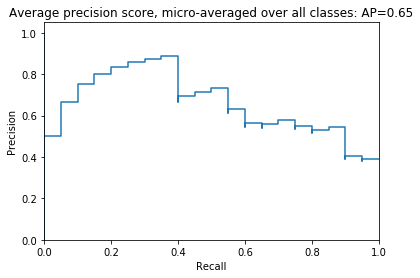

In [86]:
# plot the Average precision score
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.show()

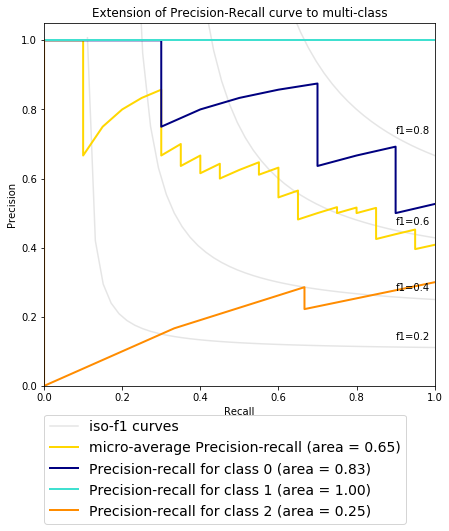

In [54]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))
plt.show()

From the chart above, it is possible to see the classes 0 and 1 with a high area under them, meaning that they generalise better than class 2. Class 1 with output 1 shows a class where the overfitting is very high.